In [1]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from src.few_shot_learning import load_cinic10, calculate_accuracy, plot_confusion_matrix

In [8]:
class FewShotConvNeXt(nn.Module):
    def __init__(self, num_classes=10):
        super(FewShotConvNeXt, self).__init__()
        self.backbone = timm.create_model('convnext_tiny', pretrained=True)  # Load pretrained ConvNeXt-Tiny
        self.backbone.head.fc = nn.Linear(self.backbone.head.fc.in_features, num_classes)  # Modify last layer

    def forward(self, x):
        return self.backbone(x)

In [23]:
def train_few_shot_convnext(model, dataloader, epochs=10, lr=0.001):
    # Freeze all layers
    for param in model.backbone.parameters():
        param.requires_grad = False

    # Unfreeze the final classification layer (head.fc)
    for param in model.backbone.head.fc.parameters():
        param.requires_grad = True

    # Unfreeze specific stages (e.g., last two stages)
    for param in model.backbone.stages[2].parameters():  # Unfreeze Stage 3
        param.requires_grad = True
    for param in model.backbone.stages[3].parameters():  # Unfreeze Stage 4
        param.requires_grad = True    
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in dataloader:  # Load few-shot dataset
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}")

I was messing around a lot with freezing layers and I found that freezing the entire backbone apart from classifier and two last stages (blocks) works best.

In [25]:
data_dir = "../../data"
dataloader = load_cinic10(data_dir, few_shot_per_class=100)
model = FewShotConvNeXt()
train_few_shot_convnext(model, dataloader, epochs=30)

Epoch [1/30], Loss: 155.3752
Epoch [2/30], Loss: 128.3426
Epoch [3/30], Loss: 109.1586
Epoch [4/30], Loss: 88.3147
Epoch [5/30], Loss: 72.5132
Epoch [6/30], Loss: 54.3359
Epoch [7/30], Loss: 35.9644
Epoch [8/30], Loss: 25.2885
Epoch [9/30], Loss: 21.8740
Epoch [10/30], Loss: 9.1669
Epoch [11/30], Loss: 9.4942
Epoch [12/30], Loss: 7.5787
Epoch [13/30], Loss: 5.8739
Epoch [14/30], Loss: 5.1974
Epoch [15/30], Loss: 3.8562
Epoch [16/30], Loss: 1.8793
Epoch [17/30], Loss: 2.8786
Epoch [18/30], Loss: 7.0304
Epoch [19/30], Loss: 3.7206
Epoch [20/30], Loss: 5.3075
Epoch [21/30], Loss: 3.2183
Epoch [22/30], Loss: 4.3259
Epoch [23/30], Loss: 1.5637
Epoch [24/30], Loss: 4.0002
Epoch [25/30], Loss: 1.9451
Epoch [26/30], Loss: 2.4460
Epoch [27/30], Loss: 1.5301
Epoch [28/30], Loss: 3.5080
Epoch [29/30], Loss: 3.6715
Epoch [30/30], Loss: 1.0126


In [26]:
train_accuracy = calculate_accuracy(model, data_dir, split='train')

Accuracy on train set: 51.95%


In [27]:
test_accuracy = calculate_accuracy(model, data_dir, split='test')

Accuracy on test set: 50.71%


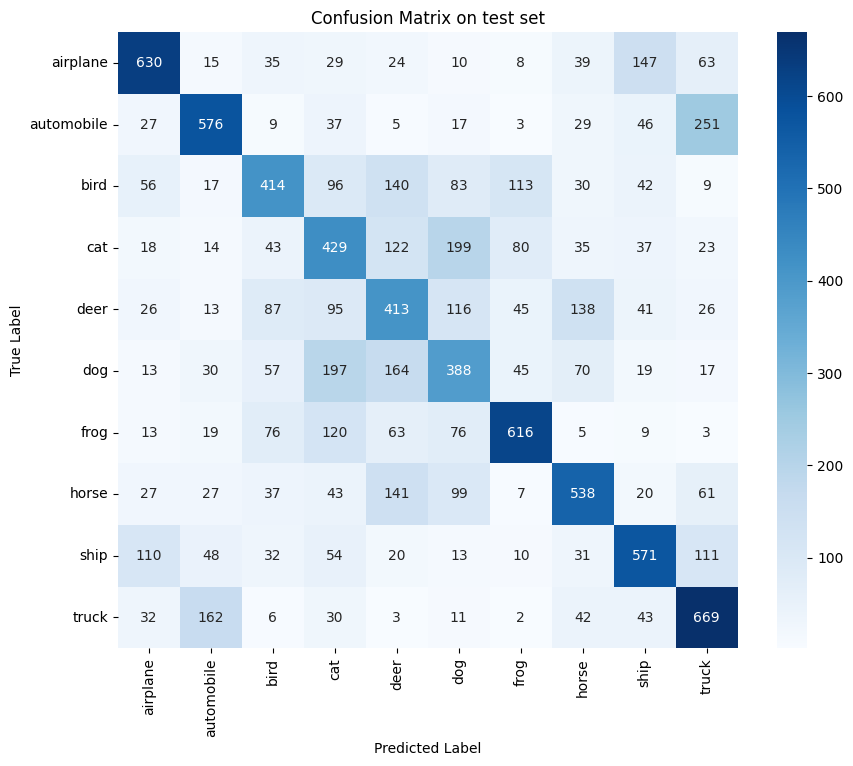

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(model, data_dir, split='test', class_names=class_names)

In [28]:
model = FewShotConvNeXt()
train_few_shot_convnext(model, dataloader, epochs=30, lr=0.0001)

Epoch [1/30], Loss: 109.5813
Epoch [2/30], Loss: 49.3762
Epoch [3/30], Loss: 16.2276
Epoch [4/30], Loss: 4.6068
Epoch [5/30], Loss: 1.9642
Epoch [6/30], Loss: 3.2175
Epoch [7/30], Loss: 7.6338
Epoch [8/30], Loss: 3.7399
Epoch [9/30], Loss: 5.2464
Epoch [10/30], Loss: 4.0603
Epoch [11/30], Loss: 11.0818
Epoch [12/30], Loss: 6.6938
Epoch [13/30], Loss: 5.0417
Epoch [14/30], Loss: 4.6462
Epoch [15/30], Loss: 4.5731
Epoch [16/30], Loss: 4.2679
Epoch [17/30], Loss: 1.1287
Epoch [18/30], Loss: 0.1276
Epoch [19/30], Loss: 0.0223
Epoch [20/30], Loss: 0.0179
Epoch [21/30], Loss: 0.0154
Epoch [22/30], Loss: 0.0137
Epoch [23/30], Loss: 0.0122
Epoch [24/30], Loss: 0.0111
Epoch [25/30], Loss: 0.0100
Epoch [26/30], Loss: 0.0092
Epoch [27/30], Loss: 0.0086
Epoch [28/30], Loss: 0.0079
Epoch [29/30], Loss: 0.0073
Epoch [30/30], Loss: 0.0069


In [31]:
train_accuracy = calculate_accuracy(model, data_dir, split='train')

Accuracy on train set: 57.02%


In [32]:
test_accuracy = calculate_accuracy(model, data_dir, split='test')

Accuracy on test set: 56.90%


In [33]:
model = FewShotConvNeXt()
train_few_shot_convnext(model, dataloader, epochs=30, lr=0.00001)

Epoch [1/30], Loss: 132.1495
Epoch [2/30], Loss: 69.8592
Epoch [3/30], Loss: 43.3768
Epoch [4/30], Loss: 26.3666
Epoch [5/30], Loss: 15.3405
Epoch [6/30], Loss: 8.8037
Epoch [7/30], Loss: 5.2313
Epoch [8/30], Loss: 3.3719
Epoch [9/30], Loss: 2.3904
Epoch [10/30], Loss: 1.7817
Epoch [11/30], Loss: 1.3715
Epoch [12/30], Loss: 1.0965
Epoch [13/30], Loss: 0.8966
Epoch [14/30], Loss: 0.7435
Epoch [15/30], Loss: 0.6257
Epoch [16/30], Loss: 0.5390
Epoch [17/30], Loss: 0.4627
Epoch [18/30], Loss: 0.4033
Epoch [19/30], Loss: 0.3544
Epoch [20/30], Loss: 0.3134
Epoch [21/30], Loss: 0.2786
Epoch [22/30], Loss: 0.2505
Epoch [23/30], Loss: 0.2243
Epoch [24/30], Loss: 0.2020
Epoch [25/30], Loss: 0.1839
Epoch [26/30], Loss: 0.1671
Epoch [27/30], Loss: 0.1525
Epoch [28/30], Loss: 0.1404
Epoch [29/30], Loss: 0.1280
Epoch [30/30], Loss: 0.1175


In [34]:
train_accuracy = calculate_accuracy(model, data_dir, split='train')
test_accuracy = calculate_accuracy(model, data_dir, split='test')

Accuracy on train set: 54.83%
Accuracy on test set: 54.88%


In [37]:
from torch.optim.lr_scheduler import StepLR
def train_few_shot_convnext_sched(model, dataloader, epochs=10, lr=0.0001):
    # Freeze all layers
    for param in model.backbone.parameters():
        param.requires_grad = False

    # Unfreeze the final classification layer (head.fc)
    for param in model.backbone.head.fc.parameters():
        param.requires_grad = True

    # Unfreeze specific stages (e.g., last two stages)
    for param in model.backbone.stages[2].parameters():  # Unfreeze Stage 3
        param.requires_grad = True
    for param in model.backbone.stages[3].parameters():  # Unfreeze Stage 4
        param.requires_grad = True    
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in dataloader:  # Load few-shot dataset
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
        
        scheduler.step()  # Update LR
    
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}")

In [38]:
model = FewShotConvNeXt()
train_few_shot_convnext_sched(model, dataloader, epochs=30)

Epoch [1/30], Loss: 108.7115
Epoch [2/30], Loss: 48.8312
Epoch [3/30], Loss: 17.5794
Epoch [4/30], Loss: 5.1678
Epoch [5/30], Loss: 3.5487
Epoch [6/30], Loss: 1.0173
Epoch [7/30], Loss: 0.1386
Epoch [8/30], Loss: 0.0949
Epoch [9/30], Loss: 0.0773
Epoch [10/30], Loss: 0.0653
Epoch [11/30], Loss: 0.0578
Epoch [12/30], Loss: 0.0537
Epoch [13/30], Loss: 0.0503
Epoch [14/30], Loss: 0.0470
Epoch [15/30], Loss: 0.0439
Epoch [16/30], Loss: 0.0415
Epoch [17/30], Loss: 0.0402
Epoch [18/30], Loss: 0.0389
Epoch [19/30], Loss: 0.0377
Epoch [20/30], Loss: 0.0363
Epoch [21/30], Loss: 0.0353
Epoch [22/30], Loss: 0.0349
Epoch [23/30], Loss: 0.0340
Epoch [24/30], Loss: 0.0336
Epoch [25/30], Loss: 0.0328
Epoch [26/30], Loss: 0.0323
Epoch [27/30], Loss: 0.0320
Epoch [28/30], Loss: 0.0317
Epoch [29/30], Loss: 0.0313
Epoch [30/30], Loss: 0.0309


In [39]:
train_accuracy = calculate_accuracy(model, data_dir, split='train')
test_accuracy = calculate_accuracy(model, data_dir, split='test')

Accuracy on train set: 59.72%
Accuracy on test set: 59.93%
